<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-08-10 19:47:18.683885


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [29]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print(us['confirmed'].sum())
    print('US Deaths')
    print(us['deaths'].sum())
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('')

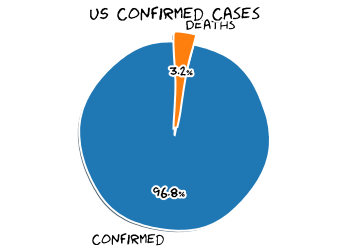

US Population
330362592
US Confirmed
5064913
US Deaths
162683
5064913 (1.5331375654057102% of population)

New York City Confirmed
228069
New York City Deaths
23586

Philippines Confirmed
136638
Philippines Deaths
2294



In [30]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

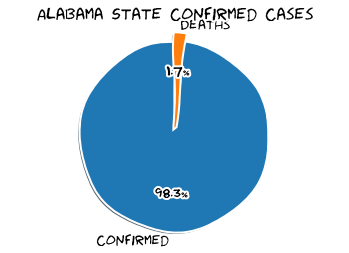

Alabama State Total Population
4887871
Alabama State Confirmed
103018 (2.1076251807791166% of population)
Alabama State Deaths
1796 (1.7433846512259994% of confirmed)



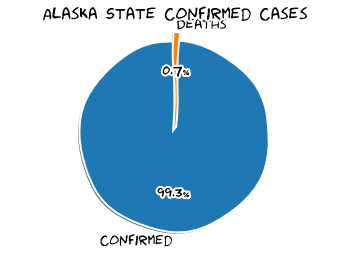

Alaska State Total Population
737438
Alaska State Confirmed
3735 (0.506483256897529% of population)
Alaska State Deaths
26 (0.6961178045515395% of confirmed)



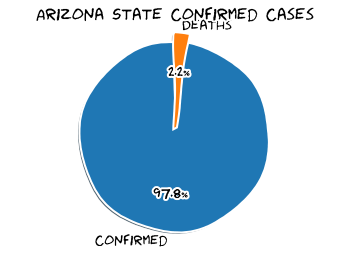

Arizona State Total Population
7171646
Arizona State Confirmed
187523 (2.6147832729055507% of population)
Arizona State Deaths
4153 (2.214661668168705% of confirmed)



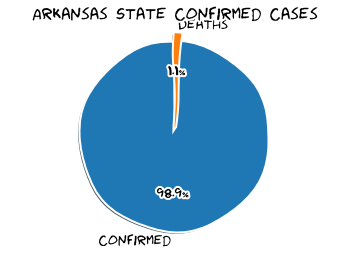

Arkansas State Total Population
3013825
Arkansas State Confirmed
49383 (1.6385490199331416% of population)
Arkansas State Deaths
544 (1.1015936658364214% of confirmed)



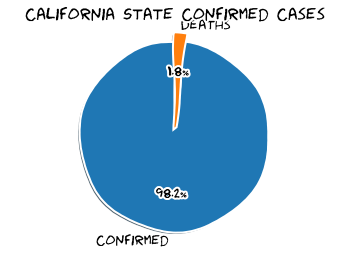

California State Total Population
39557045
California State Confirmed
561393 (1.4191985270891696% of population)
California State Deaths
10382 (1.849328367115372% of confirmed)



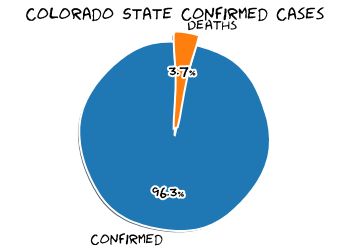

Colorado State Total Population
5695564
Colorado State Confirmed
50642 (0.8891481159723602% of population)
Colorado State Deaths
1858 (3.668891433987599% of confirmed)



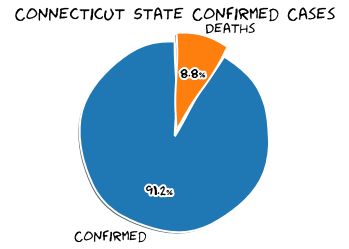

Connecticut State Total Population
3572665
Connecticut State Confirmed
50320 (1.4084723868596691% of population)
Connecticut State Deaths
4441 (8.82551669316375% of confirmed)



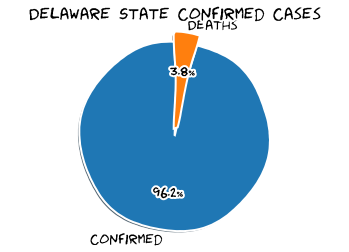

Delaware State Total Population
967171
Delaware State Confirmed
15634 (1.6164669949781372% of population)
Delaware State Deaths
591 (3.780222591787131% of confirmed)



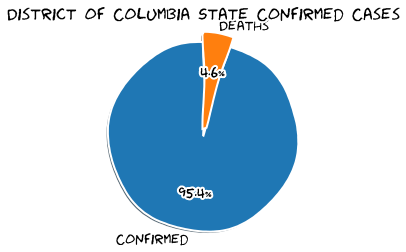

District of Columbia State Total Population
702455
District of Columbia State Confirmed
12807 (1.823177285377711% of population)
District of Columbia State Deaths
591 (4.614663855703912% of confirmed)



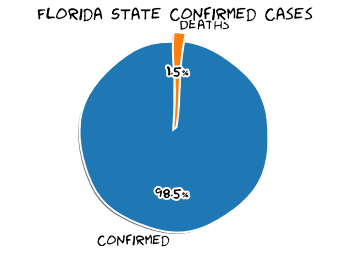

Florida State Total Population
21299325
Florida State Confirmed
536959 (2.521014163594386% of population)
Florida State Deaths
8276 (1.5412722386625424% of confirmed)



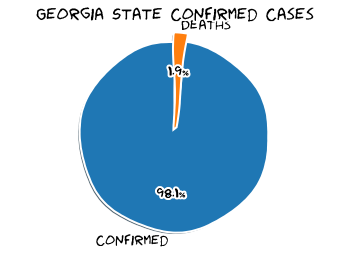

Georgia State Total Population
10519475
Georgia State Confirmed
216901 (2.061899476922565% of population)
Georgia State Deaths
4202 (1.9372893624280203% of confirmed)



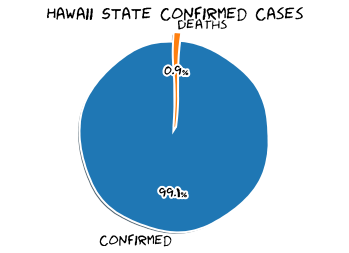

Hawaii State Total Population
1420491
Hawaii State Confirmed
3498 (0.24625288016608343% of population)
Hawaii State Deaths
31 (0.8862206975414523% of confirmed)



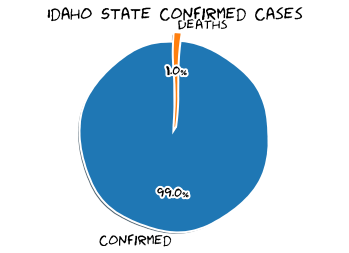

Idaho State Total Population
1754208
Idaho State Confirmed
24675 (1.4066176872981995% of population)
Idaho State Deaths
237 (0.9604863221884499% of confirmed)



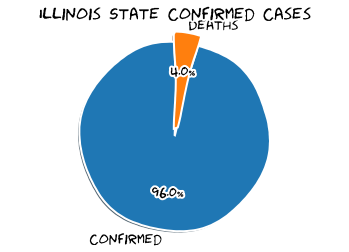

Illinois State Total Population
12741080
Illinois State Confirmed
196699 (1.5438173216085294% of population)
Illinois State Deaths
7846 (3.9888357337861406% of confirmed)



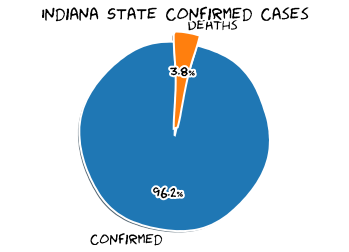

Indiana State Total Population
6691878
Indiana State Confirmed
74992 (1.1206420678918534% of population)
Indiana State Deaths
2838 (3.784403669724771% of confirmed)



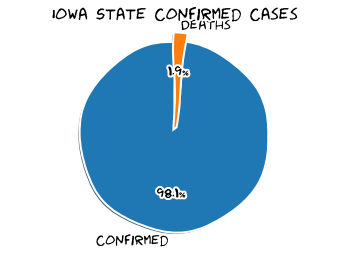

Iowa State Total Population
3156145
Iowa State Confirmed
49059 (1.5543962650638674% of population)
Iowa State Deaths
932 (1.8997533582013493% of confirmed)



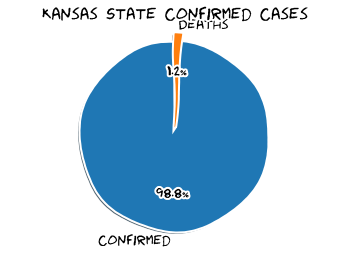

Kansas State Total Population
2911510
Kansas State Confirmed
30844 (1.0593815580231563% of population)
Kansas State Deaths
380 (1.2320062248735573% of confirmed)



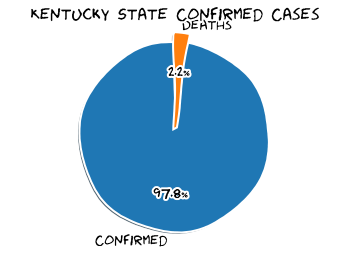

Kentucky State Total Population
4468402
Kentucky State Confirmed
34982 (0.7828749517165198% of population)
Kentucky State Deaths
773 (2.2097078497513007% of confirmed)



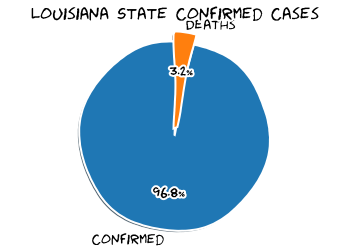

Louisiana State Total Population
4659978
Louisiana State Confirmed
131960 (2.831773025537889% of population)
Louisiana State Deaths
4286 (3.247953925431949% of confirmed)



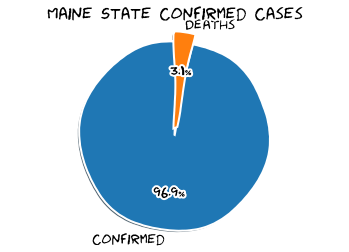

Maine State Total Population
1338404
Maine State Confirmed
4051 (0.3026739310402539% of population)
Maine State Deaths
125 (3.085657862256233% of confirmed)



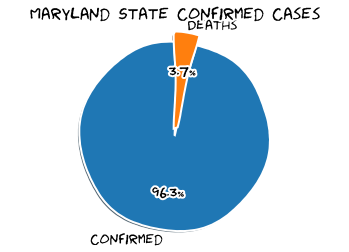

Maryland State Total Population
6042718
Maryland State Confirmed
96258 (1.5929586652893617% of population)
Maryland State Deaths
3573 (3.7118992707099667% of confirmed)



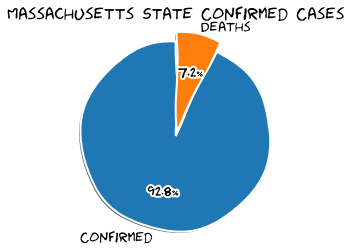

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
121040 (1.7536567234349765% of population)
Massachusetts State Deaths
8735 (7.216622604097819% of confirmed)



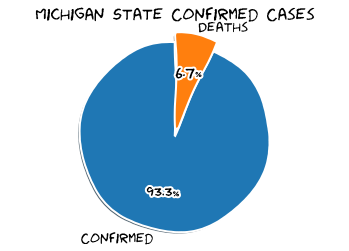

Michigan State Total Population
9995915
Michigan State Confirmed
96816 (0.9685556549850615% of population)
Michigan State Deaths
6521 (6.735456949264584% of confirmed)



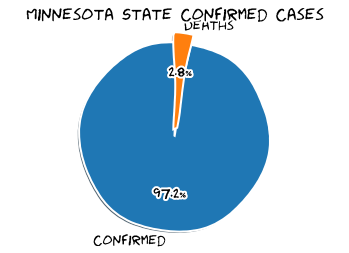

Minnesota State Total Population
5611179
Minnesota State Confirmed
61516 (1.0963114881916973% of population)
Minnesota State Deaths
1701 (2.7651342740100135% of confirmed)



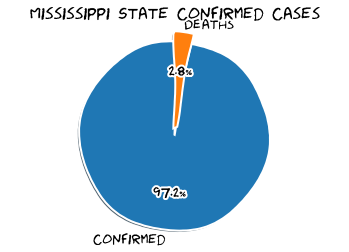

Mississippi State Total Population
2986530
Mississippi State Confirmed
67649 (2.2651371323911027% of population)
Mississippi State Deaths
1911 (2.824875460095493% of confirmed)



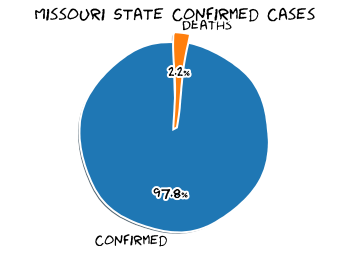

Missouri State Total Population
6126452
Missouri State Confirmed
59539 (0.9718349217458979% of population)
Missouri State Deaths
1334 (2.240548212096273% of confirmed)



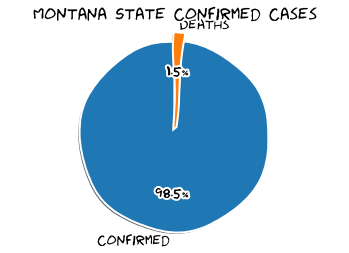

Montana State Total Population
1062305
Montana State Confirmed
5017 (0.47227491163084045% of population)
Montana State Deaths
75 (1.494917281243771% of confirmed)



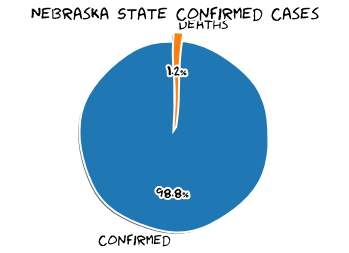

Nebraska State Total Population
1929268
Nebraska State Confirmed
28432 (1.4737195661774312% of population)
Nebraska State Deaths
345 (1.2134214969048958% of confirmed)



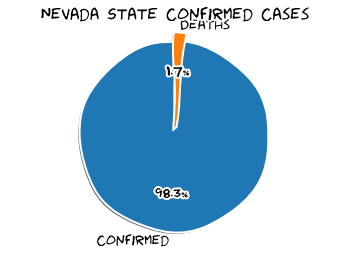

Nevada State Total Population
3034392
Nevada State Confirmed
56972 (1.877542519226257% of population)
Nevada State Deaths
963 (1.6903040089868708% of confirmed)



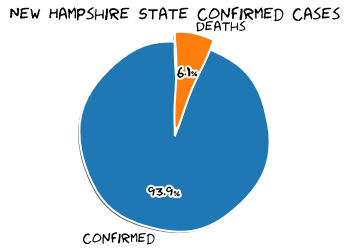

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6835 (0.5038858556623205% of population)
New Hampshire State Deaths
419 (6.130212143379663% of confirmed)



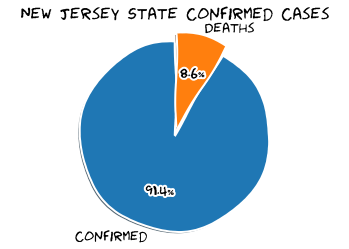

New Jersey State Total Population
8908520
New Jersey State Confirmed
185031 (2.077011669727407% of population)
New Jersey State Deaths
15878 (8.581264761040043% of confirmed)



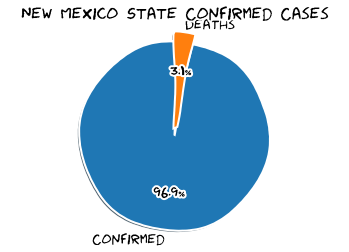

New Mexico State Total Population
2095428
New Mexico State Confirmed
22315 (1.0649375688403513% of population)
New Mexico State Deaths
685 (3.0696840690118754% of confirmed)



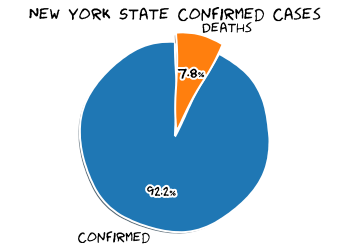

New York State Total Population
19542209
New York State Confirmed
421336 (2.1560305695226165% of population)
New York State Deaths
32780 (7.780014050543984% of confirmed)



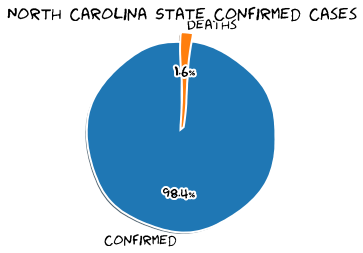

North Carolina State Total Population
10383620
North Carolina State Confirmed
136993 (1.319318310955139% of population)
North Carolina State Deaths
2193 (1.6008117203068768% of confirmed)



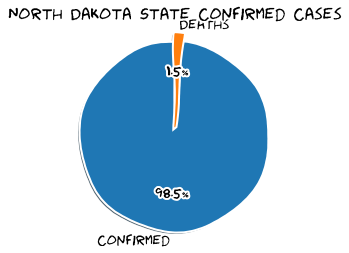

North Dakota State Total Population
760077
North Dakota State Confirmed
7713 (1.0147656092737973% of population)
North Dakota State Deaths
113 (1.465058991313367% of confirmed)



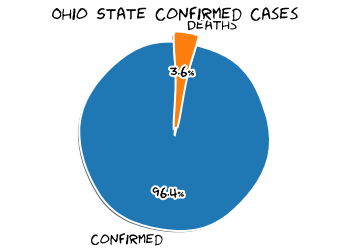

Ohio State Total Population
11689442
Ohio State Confirmed
101000 (0.8640275558063422% of population)
Ohio State Deaths
3670 (3.6336633663366333% of confirmed)



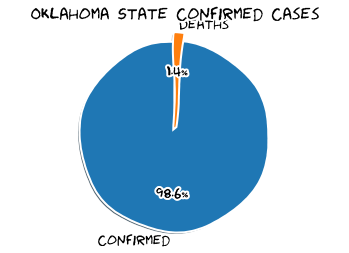

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
43967 (1.1150423311325997% of population)
Oklahoma State Deaths
605 (1.3760320240180135% of confirmed)



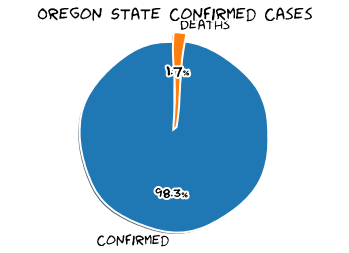

Oregon State Total Population
4190713
Oregon State Confirmed
21272 (0.5075985876389053% of population)
Oregon State Deaths
356 (1.6735614892816848% of confirmed)



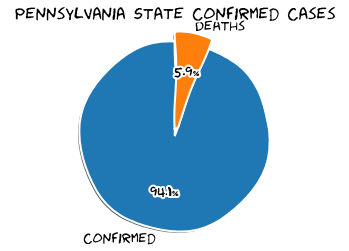

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
124103 (0.9690202122891592% of population)
Pennsylvania State Deaths
7314 (5.893491696413463% of confirmed)



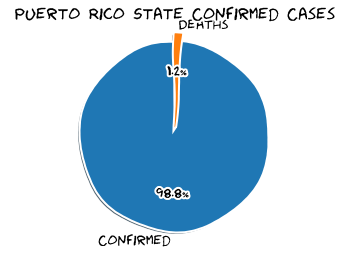

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
22821 (0.7142380975183349% of population)
Puerto Rico State Deaths
279 (1.2225581701064807% of confirmed)



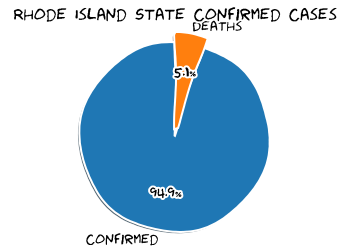

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
19934 (1.8853416436918042% of population)
Rhode Island State Deaths
1015 (5.091802949734123% of confirmed)



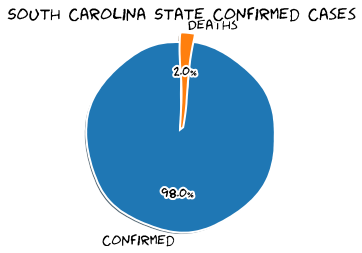

South Carolina State Total Population
5084127
South Carolina State Confirmed
100484 (1.9764258445943619% of population)
South Carolina State Deaths
2033 (2.0232076748537082% of confirmed)



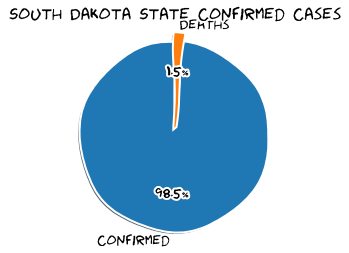

South Dakota State Total Population
882235
South Dakota State Confirmed
9663 (1.095286403282572% of population)
South Dakota State Deaths
146 (1.510917934388906% of confirmed)



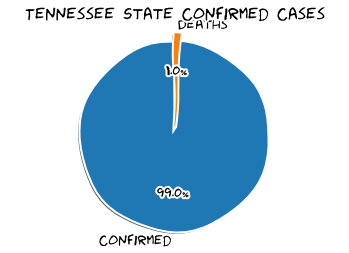

Tennessee State Total Population
6770010
Tennessee State Confirmed
122372 (1.807560107001319% of population)
Tennessee State Deaths
1222 (0.9985944497107182% of confirmed)



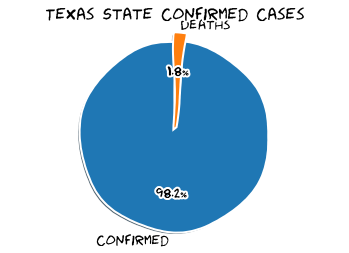

Texas State Total Population
28701845
Texas State Confirmed
504104 (1.7563470222907274% of population)
Texas State Deaths
8931 (1.7716582292542808% of confirmed)



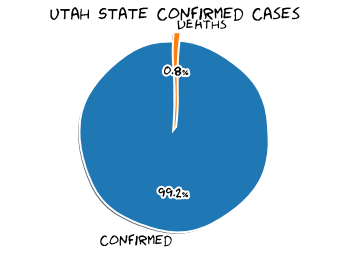

Utah State Total Population
3161105
Utah State Confirmed
44128 (1.3959675493221515% of population)
Utah State Deaths
337 (0.7636874546773024% of confirmed)



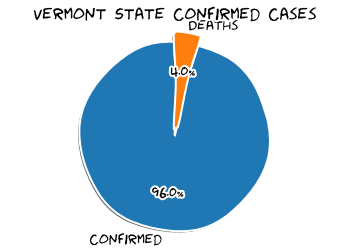

Vermont State Total Population
626299
Vermont State Confirmed
1462 (0.23343482905129978% of population)
Vermont State Deaths
58 (3.9671682626538987% of confirmed)



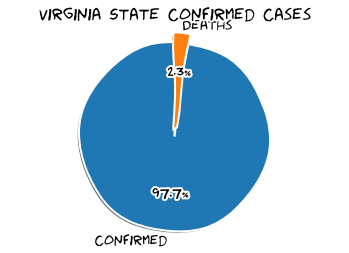

Virginia State Total Population
8517685
Virginia State Confirmed
100749 (1.1828213886754442% of population)
Virginia State Deaths
2327 (2.3097003444202917% of confirmed)



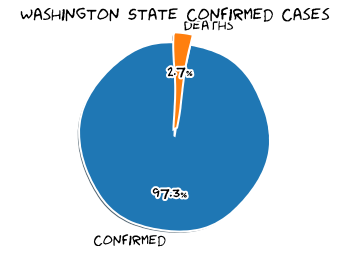

Washington State Total Population
7535591
Washington State Confirmed
63072 (0.8369881008669392% of population)
Washington State Deaths
1688 (2.676306443429731% of confirmed)



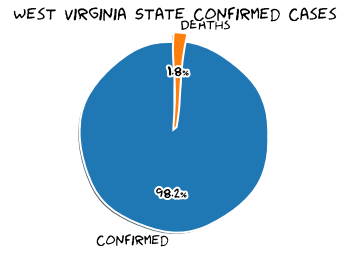

West Virginia State Total Population
1805832
West Virginia State Confirmed
7757 (0.42955269371680205% of population)
West Virginia State Deaths
141 (1.8177130333891969% of confirmed)



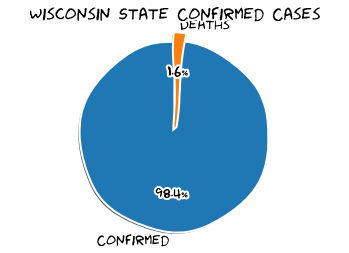

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
60726 (1.044556458271409% of population)
Wisconsin State Deaths
998 (1.6434476171656294% of confirmed)



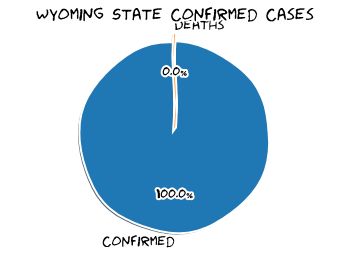

Wyoming State Total Population
577737
Wyoming State Confirmed
3050 (0.5279218744861416% of population)
Wyoming State Deaths
1 (0.03278688524590164% of confirmed)



In [10]:
for i in states:
    state_details(i)

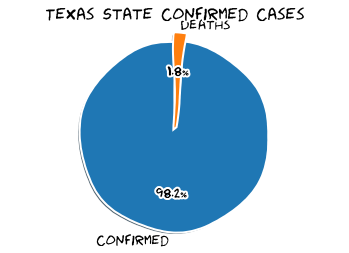

Texas State Total Population
28701845
Texas State Confirmed
504104 (1.7563470222907274% of population)
Texas State Deaths
8931 (1.7716582292542808% of confirmed)



In [11]:
state_details('Texas')

In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 19936547},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 732467},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-08-10T17:35:04.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 12150055},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-08-10 04:34:55,34.22333378,-82.46170658,335,9,0,326,"Abbeville, South Carolina, US",1365.8417254454275,2.6865671641791047
1,22001,Acadia,Louisiana,US,2020-08-10 04:34:55,30.295064899999996,-92.41419698,2598,83,0,2515,"Acadia, Louisiana, US",4187.283423321783,3.194765204003079
2,51001,Accomack,Virginia,US,2020-08-10 04:34:55,37.76707161,-75.63234615,1100,16,0,1084,"Accomack, Virginia, US",3403.8866196311424,1.4545454545454546
3,16001,Ada,Idaho,US,2020-08-10 04:34:55,43.4526575,-116.24155159999998,8949,81,0,8868,"Ada, Idaho, US",1858.2312230188932,0.9051290646999665
4,19001,Adair,Iowa,US,2020-08-10 04:34:55,41.33075609,-94.47105874,30,0,0,30,"Adair, Iowa, US",419.4630872483222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,90023,Unassigned,Maine,US,2020-08-04 12:34:49,,,2,0,0,2,"Unassigned, Maine, US",,0.0
3936,,,Unknown,Colombia,2020-07-17 22:34:48,,,0,0,0,0,"Unknown, Colombia",,
3937,,,Grand Princess,Canada,2020-07-13 12:34:33,,,13,0,13,0,"Grand Princess, Canada",,0.0
3938,16061,Lewis,Idaho,US,2020-07-10 02:34:22,46.23315327,-116.434146,1,0,0,1,"Lewis, Idaho, US",26.055237102657642,0.0


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597080904000,40.767273,-73.971526,228069,0,23586,204483,New York City,36061,"New York City, New York, US",2735.684375,None,None,84036061,USA
1,California,US,1597080904000,34.308284,-118.228241,208563,0,4977,203586,Los Angeles,06037,"Los Angeles, California, US",2077.505499,None,None,84006037,USA
2,Florida,US,1597080904000,25.611236,-80.551706,133623,0,1874,131749,Miami-Dade,12086,"Miami-Dade, Florida, US",4918.143205,None,None,84012086,USA
3,Arizona,US,1597080904000,33.348359,-112.491815,126371,0,2356,124015,Maricopa,04013,"Maricopa, Arizona, US",2817.376501,None,None,84004013,USA
4,Illinois,US,1597080904000,41.841448,-87.816588,111948,0,4928,107020,Cook,17031,"Cook, Illinois, US",2173.649231,None,None,84017031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,Montana,US,1597087471000,46.860480,-105.379384,1,0,0,1,Prairie,30079,"Prairie, Montana, US",92.850511,None,None,84030079,USA
3206,Nebraska,US,1597087471000,41.913590,-100.555663,1,0,0,1,Thomas,31171,"Thomas, Nebraska, US",138.504155,None,None,84031171,USA
3207,Kansas,US,1597087471000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3208,Nebraska,US,1597087471000,41.914827,-98.527989,1,0,0,1,Wheeler,31183,"Wheeler, Nebraska, US",127.713921,None,None,84031183,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597080904000,40.767273,-73.971526,228069,0,23586,204483,New York City,36061,"New York City, New York, US",2735.684375,None,None,84036061,USA
9,New York,US,1597080904000,40.883201,-72.801217,43844,0,1998,41846,Suffolk,36103,"Suffolk, New York, US",2969.251680,None,None,84036103,USA
10,New York,US,1597080904000,40.740665,-73.589419,43690,0,2194,41496,Nassau,36059,"Nassau, New York, US",3219.782390,None,None,84036059,USA
15,New York,US,1597080904000,41.162784,-73.757417,36233,0,1447,34786,Westchester,36119,"Westchester, New York, US",3744.989695,None,None,84036119,USA
64,New York,US,1597080904000,41.150279,-74.025605,13949,0,674,13275,Rockland,36087,"Rockland, New York, US",4281.605579,None,None,84036087,USA
85,New York,US,1597080904000,41.403375,-74.302408,11168,0,491,10677,Orange,36071,"Orange, New York, US",2901.231361,None,None,84036071,USA
119,New York,US,1597080904000,42.762490,-78.730637,8918,0,671,8247,Erie,36029,"Erie, New York, US",970.717382,None,None,84036029,USA
198,New York,US,1597080904000,43.146389,-77.693229,4976,0,285,4691,Monroe,36055,"Monroe, New York, US",670.827885,None,None,84036055,USA
209,New York,US,1597080904000,41.764861,-73.743567,4613,0,153,4460,Dutchess,36027,"Dutchess, New York, US",1567.885038,None,None,84036027,USA
257,New York,US,1597080904000,43.004919,-76.199712,3585,0,200,3385,Onondaga,36067,"Onondaga, New York, US",778.454296,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

421336

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1597080904000,40.767273,-73.971526,228069,0,23586,204483,New York City,36061,"New York City, New York, US",2735.684375,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
25,None,Philippines,1597087471000,12.879721,121.774017,136638,68159,2294,66185,None,None,Philippines,124.691228,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
